In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

import seaborn as sns

from datetime import datetime, timedelta

In [2]:
building4 = pd.read_csv('building4.csv')

In [3]:
building4['timestamp'] = pd.to_datetime(building4['timestamp'])

In [4]:
building4.head()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number
0,2017-04-01 00:00:00,3472.022100,0.000000,1003.452471,4
1,2017-04-01 00:15:00,3994.211735,15.644386,1252.996941,4
2,2017-04-01 00:30:00,3518.666628,8.909244,990.175973,4
3,2017-04-01 00:45:00,3639.496844,0.000000,994.095052,4
4,2017-04-01 01:00:00,3503.013915,8.430219,927.320840,4


In [5]:
assert(building4['building_number'].unique() == [4])

In [6]:
building4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26400 entries, 0 to 26399
Data columns (total 5 columns):
timestamp          26400 non-null datetime64[ns]
main_meter         26400 non-null float64
sub_meter_1        26400 non-null float64
sub_meter_2        26400 non-null float64
building_number    26400 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.0 MB


In [7]:
building4.head()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number
0,2017-04-01 00:00:00,3472.022100,0.000000,1003.452471,4
1,2017-04-01 00:15:00,3994.211735,15.644386,1252.996941,4
2,2017-04-01 00:30:00,3518.666628,8.909244,990.175973,4
3,2017-04-01 00:45:00,3639.496844,0.000000,994.095052,4
4,2017-04-01 01:00:00,3503.013915,8.430219,927.320840,4


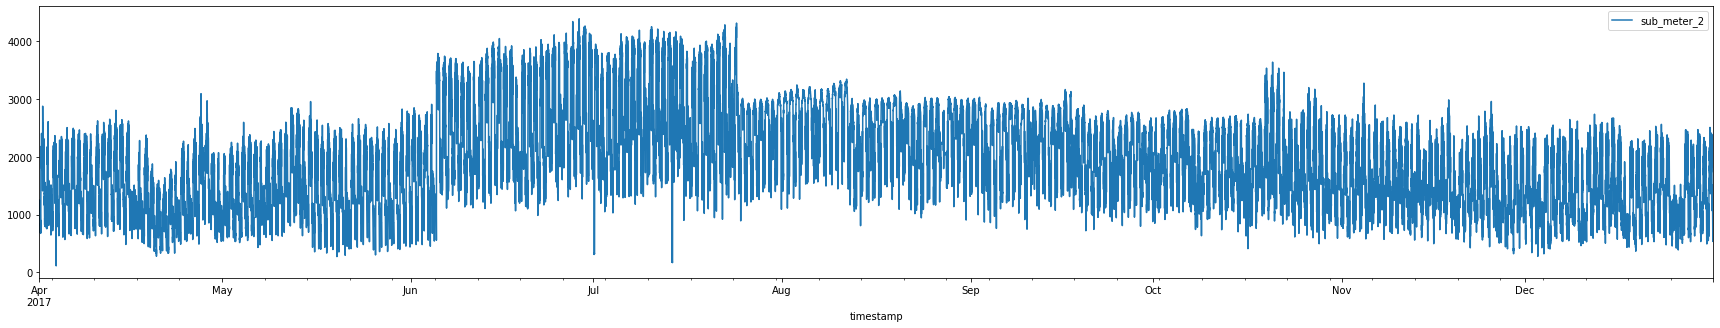

In [8]:
building4.plot(x='timestamp', y='sub_meter_2', figsize=(30, 5))

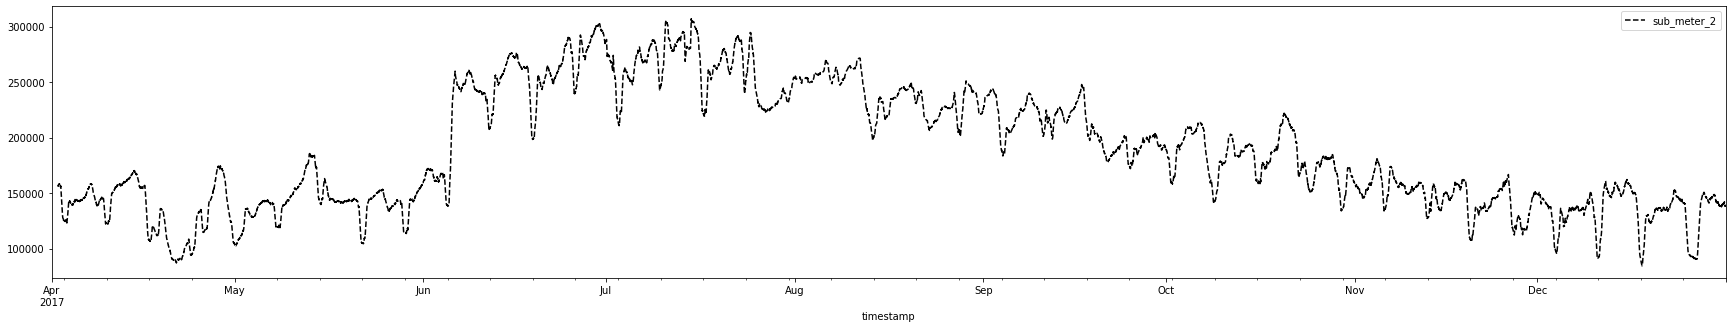

In [9]:
window = 96
building4[['timestamp', 'sub_meter_2']].rolling(window, win_type=None, on='timestamp').sum().plot(x='timestamp', y='sub_meter_2', figsize=(30, 5), style='k--')

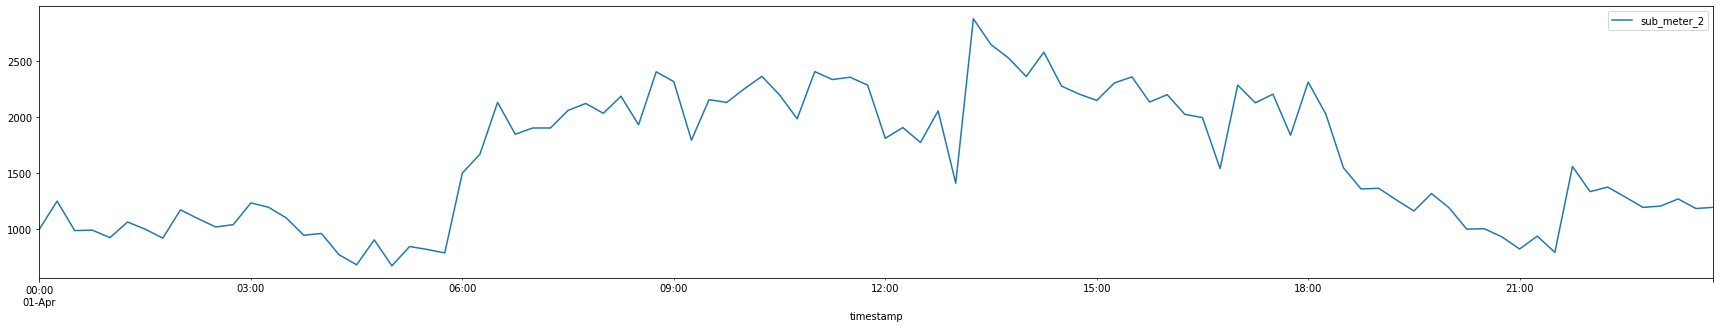

In [10]:
building4.iloc[:96].plot(x='timestamp', y='sub_meter_2', figsize=(30, 5))

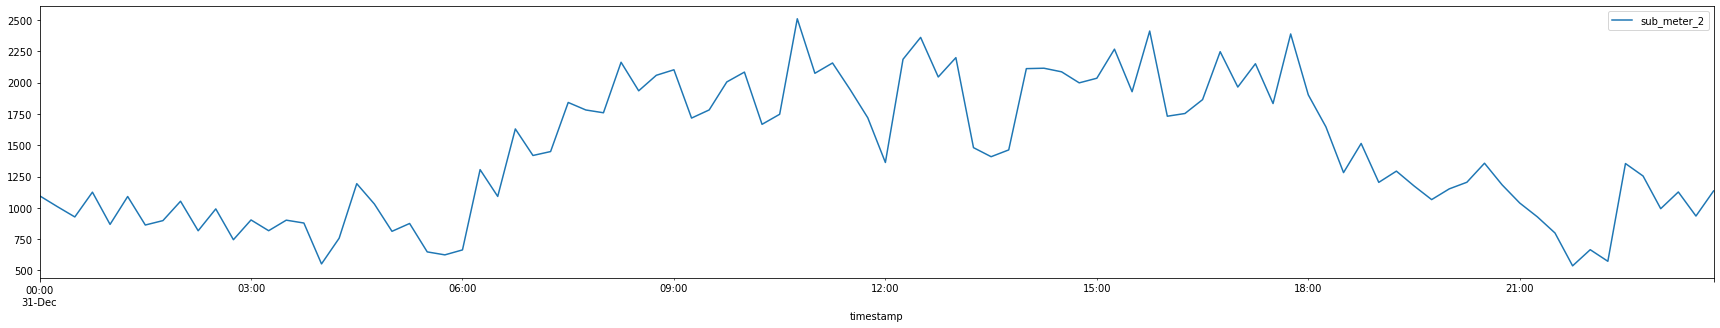

In [11]:
building4.iloc[-96:].plot(x='timestamp', y='sub_meter_2', figsize=(30, 5))

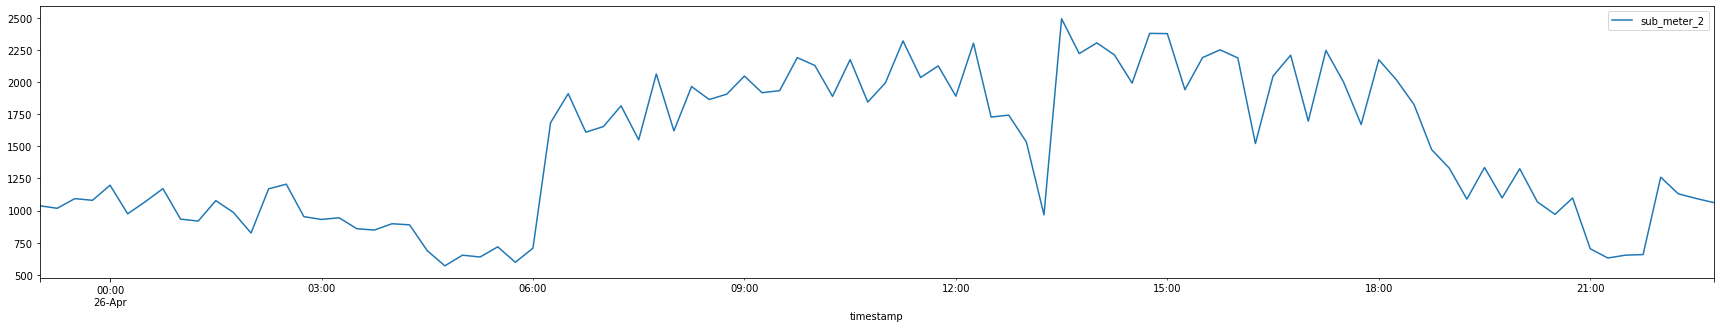

In [12]:
building4.iloc[2396:(2396+96)].plot(x='timestamp', y='sub_meter_2', figsize=(30, 5))

In [13]:
day_wise_building4_sub_meter_2 = building4[['timestamp', 'sub_meter_2']].rolling(window, win_type=None, on='timestamp').sum().iloc[95::96, :].reset_index(drop=True)
day_wise_building4_sub_meter_2['timestamp'] = day_wise_building4_sub_meter_2['timestamp'].apply(lambda x : x.date())
day_wise_building4_sub_meter_2.head()

,timestamp,sub_meter_2
0,2017-04-01,156096.052262
1,2017-04-02,125448.944710
2,2017-04-03,142367.618741
3,2017-04-04,143578.769858
4,2017-04-05,144363.114652


In [14]:
day_wise_building4_sub_meter_2.shape

(275, 2)

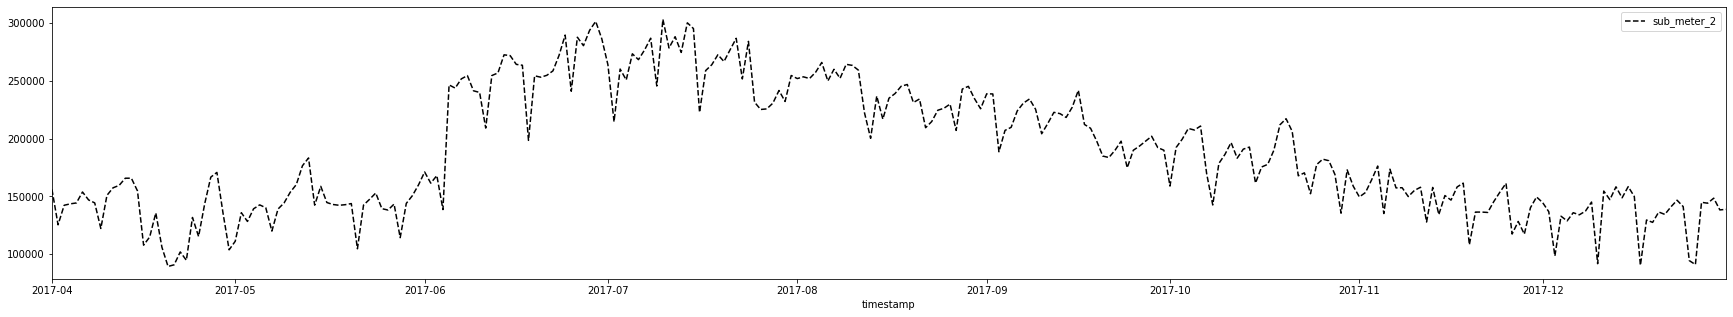

In [15]:
day_wise_building4_sub_meter_2.plot(x='timestamp', y='sub_meter_2', style='k--', figsize=(30, 5))

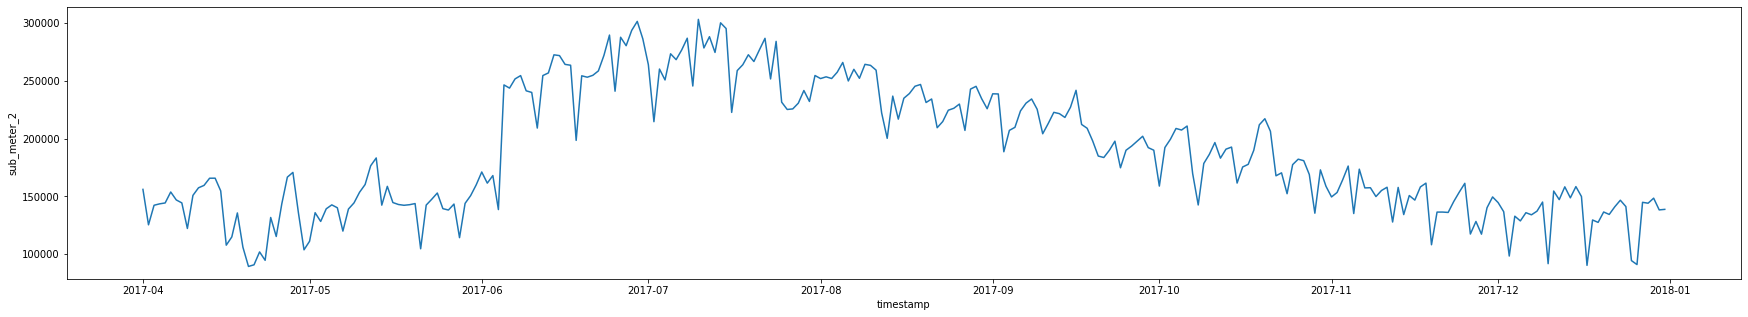

In [16]:
plt.figure(figsize=(30, 5))
sns.lineplot(data = day_wise_building4_sub_meter_2, x='timestamp', y='sub_meter_2')

### Adding all 96 data of a day as individual 96 columns

In [17]:
assert(np.array_equal(building4['sub_meter_2'].values.reshape(-1, 96)[0], building4.loc[:95, 'sub_meter_2'].values))

In [18]:
day_wise_building4_sub_meter_2 = pd.concat([day_wise_building4_sub_meter_2, pd.DataFrame(building4['sub_meter_2'].values.reshape(-1, 96))], axis=1)

In [19]:
day_wise_building4_sub_meter_2.head()

,timestamp,sub_meter_2,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,156096.052262,1003.452471,1252.996941,990.175973,994.095052,927.320840,1066.613769,1002.731382,922.597511,...,796.406699,1561.387356,1337.508050,1377.811202,1288.916450,1196.715555,1208.834157,1272.375503,1187.015619,1197.363550
1,2017-04-02,125448.944710,1198.848478,1473.839390,801.692451,1328.839863,1242.640288,1307.273852,1022.418392,1225.105731,...,660.662021,647.569597,1514.800332,1224.364995,1380.929434,1210.917965,1229.964462,1109.991290,1460.493780,971.926858
2,2017-04-03,142367.618741,1280.966836,978.121595,1251.876392,1060.706991,1344.165883,1149.971111,1123.673635,1149.087599,...,834.688762,790.307507,888.670343,1682.059429,1170.200940,1194.268082,1332.640948,1026.317012,1270.155024,1031.640058
3,2017-04-04,143578.769858,1030.329112,945.563227,896.751124,897.135286,896.400665,1245.352036,1103.849325,1066.348986,...,989.942405,680.267627,841.090888,1512.403204,1344.922422,1199.750495,1086.887018,1023.338678,1198.265740,978.393806
4,2017-04-05,144363.114652,1175.248472,1032.915056,1075.967064,1034.950040,971.305511,1130.921212,1005.580809,1052.682217,...,667.428195,840.825333,984.855510,1539.762027,1287.488185,1339.957043,1239.911081,989.308334,1024.284565,1415.296423


### Adding `is_weekend` column

In [20]:
day_wise_building4_sub_meter_2.insert(1, 'is_weekend', day_wise_building4_sub_meter_2['timestamp'].apply(lambda x : x.weekday()>=5).astype(int))
day_wise_building4_sub_meter_2.head()

,timestamp,is_weekend,sub_meter_2,0,1,2,3,4,5,6,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,1,156096.052262,1003.452471,1252.996941,990.175973,994.095052,927.320840,1066.613769,1002.731382,...,796.406699,1561.387356,1337.508050,1377.811202,1288.916450,1196.715555,1208.834157,1272.375503,1187.015619,1197.363550
1,2017-04-02,1,125448.944710,1198.848478,1473.839390,801.692451,1328.839863,1242.640288,1307.273852,1022.418392,...,660.662021,647.569597,1514.800332,1224.364995,1380.929434,1210.917965,1229.964462,1109.991290,1460.493780,971.926858
2,2017-04-03,0,142367.618741,1280.966836,978.121595,1251.876392,1060.706991,1344.165883,1149.971111,1123.673635,...,834.688762,790.307507,888.670343,1682.059429,1170.200940,1194.268082,1332.640948,1026.317012,1270.155024,1031.640058
3,2017-04-04,0,143578.769858,1030.329112,945.563227,896.751124,897.135286,896.400665,1245.352036,1103.849325,...,989.942405,680.267627,841.090888,1512.403204,1344.922422,1199.750495,1086.887018,1023.338678,1198.265740,978.393806
4,2017-04-05,0,144363.114652,1175.248472,1032.915056,1075.967064,1034.950040,971.305511,1130.921212,1005.580809,...,667.428195,840.825333,984.855510,1539.762027,1287.488185,1339.957043,1239.911081,989.308334,1024.284565,1415.296423


### Getting separate lineplot for weekend and weekday

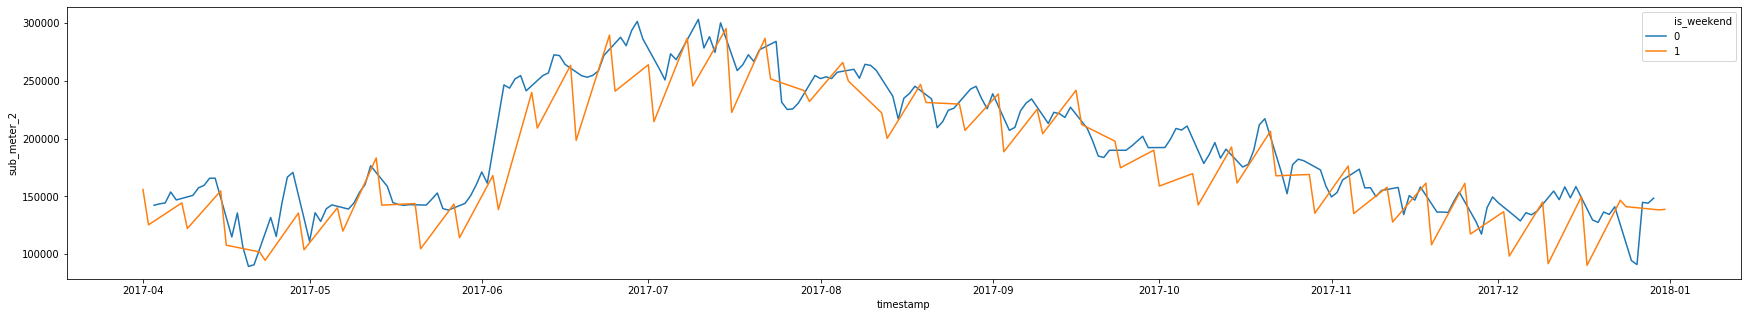

In [21]:
plt.figure(figsize=(30, 5))
ax = sns.lineplot(data = day_wise_building4_sub_meter_2, x='timestamp', y='sub_meter_2', hue='is_weekend')

(736420.0, 736694.0)

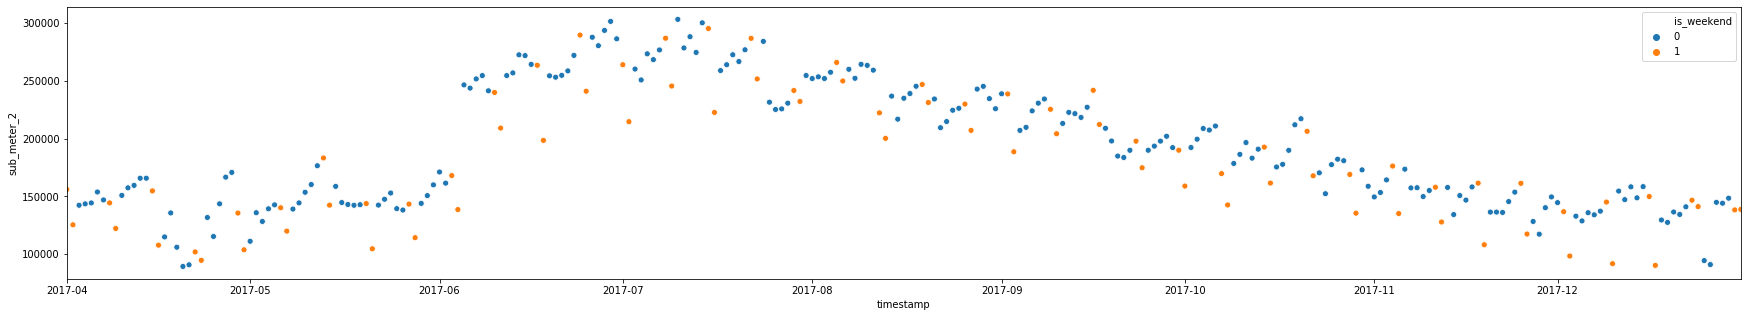

In [22]:
plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = day_wise_building4_sub_meter_2, x='timestamp', y='sub_meter_2', hue='is_weekend')
ax.set_xlim(day_wise_building4_sub_meter_2['timestamp'].min(), day_wise_building4_sub_meter_2['timestamp'].max())

In [23]:
day_wise_building4_sub_meter_2.loc[day_wise_building4_sub_meter_2.is_weekend == 1, 'sub_meter_2'].sum()

14284056.839110862

In [24]:
day_wise_building4_sub_meter_2.loc[day_wise_building4_sub_meter_2.is_weekend == 0, 'sub_meter_2'].sum()

37515339.41059862

In [25]:
def plot_custom_line_plots(data, col, label_column):
    """
    According to given labels column, change color of same line
    NOTE: For now considered label_column to be binary
    """
    
    cmap = ListedColormap(colors=['b', 'r'])
    norm = BoundaryNorm()
    
    points = data.loc[data[label_column] == 1, col].values
    segements = []

In [26]:
t = np.linspace(0, 10, 200)
x = np.cos(np.pi * t)
y = np.sin(t)

In [27]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [28]:
x.shape

(200,)

In [29]:
y.shape

(200,)

In [30]:
points[:5]

array([[[1.        , 0.        ]],

       [[0.98756455, 0.05023011]],

       [[0.95056749, 0.10033341]],

       [[0.88992896, 0.15018339]],

       [[0.8071571 , 0.19965422]]])

## FINDING SHARP CHANGE POINTS

(736619.0, 736627.0)

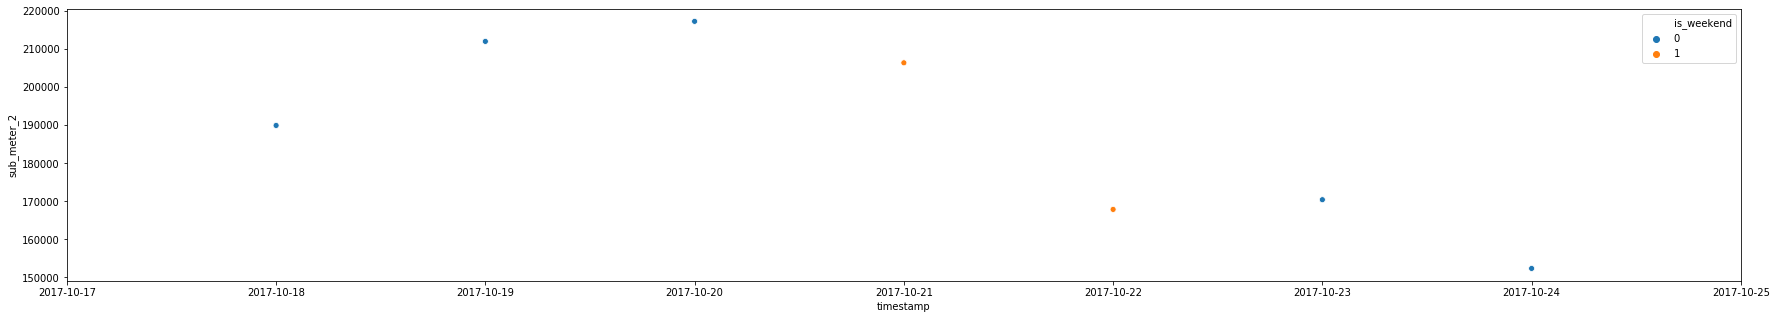

In [31]:
data = day_wise_building4_sub_meter_2.iloc[200:207]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='sub_meter_2', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

### Checking behaviour around national holidays

(736549.0, 736563.0)

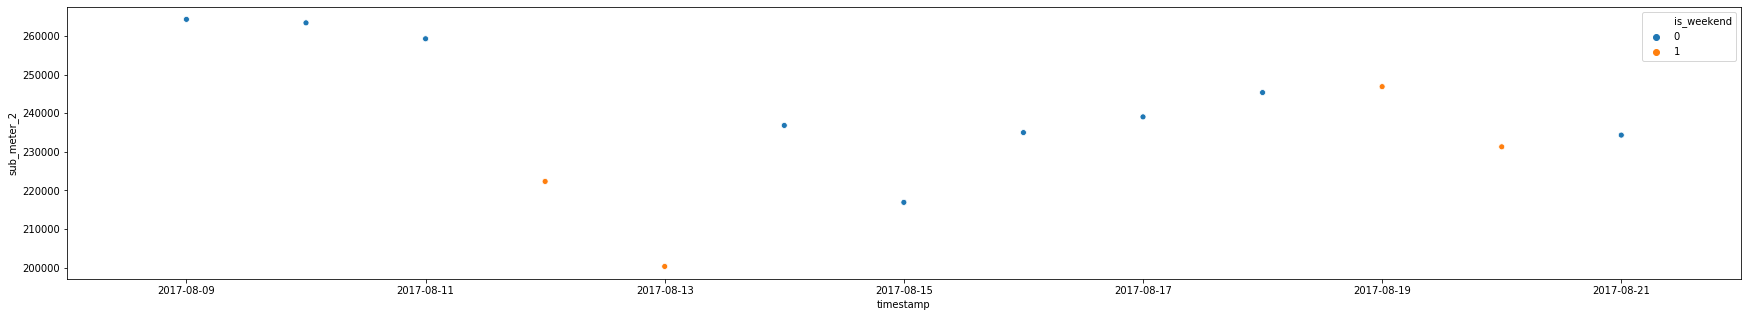

In [32]:
data = day_wise_building4_sub_meter_2.iloc[130:143]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='sub_meter_2', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

(736549.0, 736563.0)

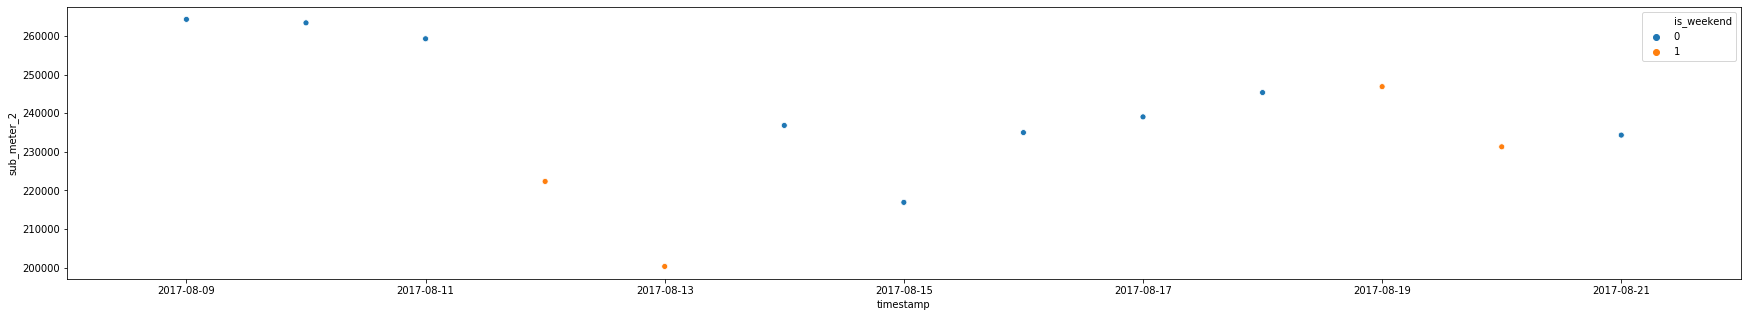

In [33]:
data = day_wise_building4_sub_meter_2.iloc[130:143]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='sub_meter_2', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

In [34]:
day_wise_building4_sub_meter_2.head()

,timestamp,is_weekend,sub_meter_2,0,1,2,3,4,5,6,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,1,156096.052262,1003.452471,1252.996941,990.175973,994.095052,927.320840,1066.613769,1002.731382,...,796.406699,1561.387356,1337.508050,1377.811202,1288.916450,1196.715555,1208.834157,1272.375503,1187.015619,1197.363550
1,2017-04-02,1,125448.944710,1198.848478,1473.839390,801.692451,1328.839863,1242.640288,1307.273852,1022.418392,...,660.662021,647.569597,1514.800332,1224.364995,1380.929434,1210.917965,1229.964462,1109.991290,1460.493780,971.926858
2,2017-04-03,0,142367.618741,1280.966836,978.121595,1251.876392,1060.706991,1344.165883,1149.971111,1123.673635,...,834.688762,790.307507,888.670343,1682.059429,1170.200940,1194.268082,1332.640948,1026.317012,1270.155024,1031.640058
3,2017-04-04,0,143578.769858,1030.329112,945.563227,896.751124,897.135286,896.400665,1245.352036,1103.849325,...,989.942405,680.267627,841.090888,1512.403204,1344.922422,1199.750495,1086.887018,1023.338678,1198.265740,978.393806
4,2017-04-05,0,144363.114652,1175.248472,1032.915056,1075.967064,1034.950040,971.305511,1130.921212,1005.580809,...,667.428195,840.825333,984.855510,1539.762027,1287.488185,1339.957043,1239.911081,989.308334,1024.284565,1415.296423


### Inserting `sub_meter_2_diff` as a column

In [35]:
sub_meter_2_diff = day_wise_building4_sub_meter_2['sub_meter_2'] - day_wise_building4_sub_meter_2['sub_meter_2'].shift(periods=1)
day_wise_building4_sub_meter_2.insert(3, 'sub_meter_2_diff', sub_meter_2_diff)
day_wise_building4_sub_meter_2.head()

,timestamp,is_weekend,sub_meter_2,sub_meter_2_diff,0,1,2,3,4,5,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,1,156096.052262,NaN,1003.452471,1252.996941,990.175973,994.095052,927.320840,1066.613769,...,796.406699,1561.387356,1337.508050,1377.811202,1288.916450,1196.715555,1208.834157,1272.375503,1187.015619,1197.363550
1,2017-04-02,1,125448.944710,-30647.107552,1198.848478,1473.839390,801.692451,1328.839863,1242.640288,1307.273852,...,660.662021,647.569597,1514.800332,1224.364995,1380.929434,1210.917965,1229.964462,1109.991290,1460.493780,971.926858
2,2017-04-03,0,142367.618741,16918.674031,1280.966836,978.121595,1251.876392,1060.706991,1344.165883,1149.971111,...,834.688762,790.307507,888.670343,1682.059429,1170.200940,1194.268082,1332.640948,1026.317012,1270.155024,1031.640058
3,2017-04-04,0,143578.769858,1211.151117,1030.329112,945.563227,896.751124,897.135286,896.400665,1245.352036,...,989.942405,680.267627,841.090888,1512.403204,1344.922422,1199.750495,1086.887018,1023.338678,1198.265740,978.393806
4,2017-04-05,0,144363.114652,784.344794,1175.248472,1032.915056,1075.967064,1034.950040,971.305511,1130.921212,...,667.428195,840.825333,984.855510,1539.762027,1287.488185,1339.957043,1239.911081,989.308334,1024.284565,1415.296423


## FOR DECLINE POINTS

## TODO
- Find Suitable `value_for_decline`

In [36]:
def get_decline_dates(data, shift=1, value_for_decline=-500):
    timestamps_with_decline = data[(data['sub_meter_2'] - data['sub_meter_2'].shift(periods=shift)) <= value_for_decline].timestamp
    return timestamps_with_decline, timestamps_with_decline.apply(lambda data : data.weekday())

In [37]:
timestamps_with_decline, weekdays_with_decline = get_decline_dates(day_wise_building4_sub_meter_2, shift=1, value_for_decline=-400)

In [38]:
timestamps_with_decline.shape

(118,)

In [39]:
weekdays_with_decline.value_counts()

6    39
1    22
3    20
5    17
4    10
2     8
0     2
Name: timestamp, dtype: int64

In [40]:
pd.set_option('display.max_rows', 70)

In [41]:
day_wise_building4_sub_meter_2.iloc[-2:]

,timestamp,is_weekend,sub_meter_2,sub_meter_2_diff,0,1,2,3,4,5,...,86,87,88,89,90,91,92,93,94,95
273,2017-12-30,1,138338.880075,-10159.036669,766.74768,1209.727573,795.673046,1157.928708,891.118076,1001.304736,...,677.594073,557.625447,761.136810,493.100242,1294.459351,1016.716997,1215.665176,907.116687,1039.583726,1066.835994
274,2017-12-31,1,138810.649470,471.769395,1096.55838,1010.446777,927.343070,1125.349605,867.796342,1090.591078,...,799.153531,536.684637,665.649171,573.100745,1353.923918,1254.123870,993.352270,1126.735926,934.571488,1134.971820


In [42]:
building4_decline_df = pd.concat([
                            timestamps_with_decline,
                            weekdays_with_decline,
                            day_wise_building4_sub_meter_2.loc[timestamps_with_decline.index, 'sub_meter_2_diff']], axis=1, ignore_index=True)
building4_decline_df.rename(columns = {0:'timestamp', 1:'weekday', 2:'sub_meter_2_diff'}, inplace=True)
building4_decline_df.sort_values(by='timestamp', ascending=True)

,timestamp,weekday,sub_meter_2_diff
1,2017-04-02,6,-30647.107552
6,2017-04-07,4,-6881.376002
7,2017-04-08,5,-2552.330821
8,2017-04-09,6,-22127.461492
14,2017-04-15,5,-11000.693351
...,...,...,...
267,2017-12-24,6,-5518.374630
268,2017-12-25,0,-46720.010168
269,2017-12-26,1,-3442.494900
271,2017-12-28,3,-758.909813


In [43]:
print('Num of Sunday : ', (building4_decline_df.weekday == 6).sum())

Num of Sunday :  39


## All sundays except 31, but there is a decline about (-100) from 20 to 31

In [44]:
building4_decline_df[building4_decline_df.weekday != 6].sort_values(by='timestamp')

,timestamp,weekday,sub_meter_2_diff
6,2017-04-07,4,-6881.376002
7,2017-04-08,5,-2552.330821
14,2017-04-15,5,-11000.693351
18,2017-04-19,2,-29653.753681
19,2017-04-20,3,-16639.835861
...,...,...,...
264,2017-12-21,3,-2103.715786
268,2017-12-25,0,-46720.010168
269,2017-12-26,1,-3442.494900
271,2017-12-28,3,-758.909813


## Observations
- Will remove 26-12-2017 due to effects of Christmas
- Will remove 16-08-2017 due to effects of Independece Day

## Inference
- Will remove points below a threshold, like 1000

## FOR INCREMENT POINTS

## TODO
- Find Suitable `value_for_increase`

In [45]:
def get_increase_dates(data, shift=1, value_for_increase=500):
    timestamps_with_increase = data[(data['sub_meter_2'] - data['sub_meter_2'].shift(periods=shift)) >= value_for_increase].timestamp
    return timestamps_with_increase, timestamps_with_increase.apply(lambda data : data.weekday())

In [46]:
timestamps_with_increase, weekdays_with_increase = get_increase_dates(day_wise_building4_sub_meter_2, shift=1, value_for_increase=400)

In [47]:
timestamps_with_increase.shape

(151,)

In [48]:
weekdays_with_increase.value_counts()

0    37
2    29
4    28
5    21
3    19
1    16
6     1
Name: timestamp, dtype: int64

In [49]:
pd.set_option('display.max_rows', 70)

In [50]:
building4_increase_df = pd.concat([
                            timestamps_with_increase,
                            weekdays_with_increase,
                            day_wise_building4_sub_meter_2.loc[timestamps_with_increase.index, 'sub_meter_2_diff']], axis=1, ignore_index=True)
building4_increase_df.rename(columns = {0:'timestamp', 1:'weekday', 2:'sub_meter_2_diff'}, inplace=True)

In [51]:
print('Num of Monday : ', (building4_increase_df.weekday == 0).sum())

Num of Monday :  37


## All sundays except 31, but there is a decline about (-100) from 20 to 31

In [52]:
building4_increase_df[building4_increase_df.weekday != 0].sort_values(by='timestamp')

,timestamp,weekday,sub_meter_2_diff
3,2017-04-04,1,1211.151117
4,2017-04-05,2,784.344794
5,2017-04-06,3,9481.848748
10,2017-04-11,1,6546.248351
11,2017-04-12,2,2104.558320
...,...,...,...
265,2017-12-22,4,6612.204483
266,2017-12-23,5,5683.486621
270,2017-12-27,2,53863.098815
272,2017-12-29,4,4352.437100


## Observations

## Inference
